# QTC Dataset Overview and Exploratory Analysis

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from tqdm.auto import tqdm

# Set style for visualizations
plt.style.use('ggplot')
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

train_path = "/home/robin/Research/qtype-eval/data/train/tydi_all_combined.csv"
dev_path = "/home/robin/Research/qtype-eval/data/dev/all_dev.csv"
# test_path =

train_df = pd.read_csv(train_path)
dev_df = pd.read_csv(dev_path)


print(f"TyDi QA samples: {len(train_df)}")
print(f"Dev samples: {len(dev_df)}")

print("\nColumn names:", train_df.columns.to_list())
train_df.head()

TyDi QA samples: 7460
Dev samples: 441

Column names: ['unique_id', 'text', 'language', 'avg_links_len', 'avg_max_depth', 'avg_subordinate_chain_len', 'avg_verb_edges', 'lexical_density', 'n_tokens', 'question_type', 'complexity_score']


,unique_id,text,language,avg_links_len,avg_max_depth,avg_subordinate_chain_len,avg_verb_edges,lexical_density,n_tokens,question_type,complexity_score
0,finnish_polar_360,Onko Tampereen rantatunneli Suomen pisin maant...,fi,0.407,0.150,0.0,0.000,0.833,2.079,1,3.469
1,russian_content_3904,В каком фильме снимался Дзюн Фукуяма?,ru,-0.378,-0.510,0.0,0.333,0.667,2.079,0,2.192
2,finnish_content_10111,Kuka oli Mary Jane Watsonin lempisukulainen pe...,fi,0.958,0.949,0.0,0.000,0.625,2.303,0,4.835
3,finnish_content_13146,Milloin HMS Castleton tilattiin?,fi,0.244,-0.051,0.0,0.333,1.000,1.792,0,3.318
4,korean_content_4335,6.25전쟁 당시 남한 편에서 싸운 나라는 몇 개국인가?,ko,-0.044,1.184,1.0,0.400,1.000,2.303,0,5.842


## Language Distribution Analysis

Having a good sense of how questions are distributed across different languages in both the training and test sets helps us understand potential biases.

Language distribution in training set:


,Language,Count,Percentage
0,fi,1195,16.018767
1,ru,1194,16.005362
2,en,1192,15.978552
3,ja,1191,15.965147
4,ar,995,13.337802
5,id,954,12.788204
6,ko,739,9.906166



Language distribution in dev set:


,Language,Count,Percentage
0,en,72,16.326531
1,ru,72,16.326531
2,id,72,16.326531
3,ko,72,16.326531
4,fi,63,14.285714
5,ja,46,10.430839
6,ar,44,9.977324


/tmp/ipykernel_643909/2053389528.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Language', y='Count', data=train_lang_dist, palette='viridis')
/tmp/ipykernel_643909/2053389528.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Language', y='Count', data=test_lang_dist, palette='viridis')


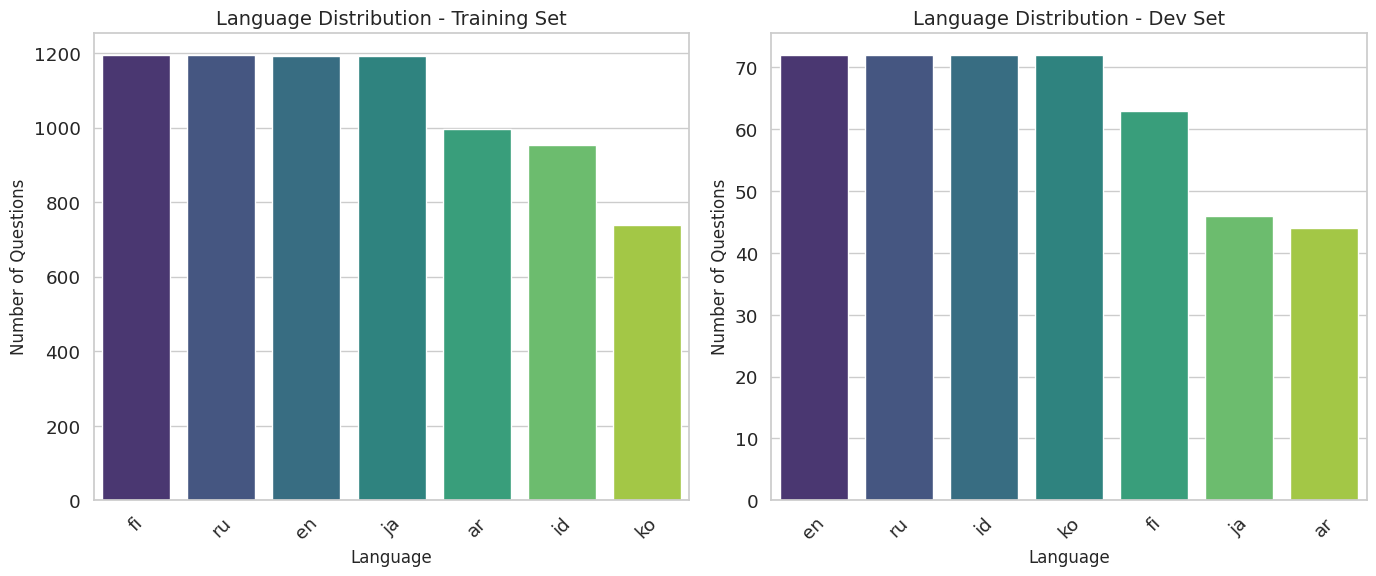

In [4]:
# Language distribution
print("Language distribution in training set:")
train_lang_dist = train_df['language'].value_counts().reset_index()
train_lang_dist.columns = ['Language', 'Count']
train_lang_dist['Percentage'] = 100 * train_lang_dist['Count'] / len(train_df)
display(train_lang_dist)

print("\nLanguage distribution in dev set:")
test_lang_dist = dev_df['language'].value_counts().reset_index()
test_lang_dist.columns = ['Language', 'Count']
test_lang_dist['Percentage'] = 100 * test_lang_dist['Count'] / len(dev_df)
display(test_lang_dist)

# Plot language distribution
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Language', y='Count', data=train_lang_dist, palette='viridis')
plt.title('Language Distribution - Training Set', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Number of Questions', fontsize=12)
plt.xlabel('Language', fontsize=12)

plt.subplot(1, 2, 2)
sns.barplot(x='Language', y='Count', data=test_lang_dist, palette='viridis')
plt.title('Language Distribution - Dev Set', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Number of Questions', fontsize=12)
plt.xlabel('Language', fontsize=12)
plt.tight_layout()
plt.show()

## Question Type Distribution

Doing the same for question types allows us to identify any class imbalances that might affect our classification models.

Question type distribution in training set:


,Type,Count,Percentage
0,Content,3778,50.643432
1,Polar,3682,49.356568



Question type distribution in dev set:


,Type,Count,Percenage
0,Content,223,50.566893
1,Polar,218,49.433107


/tmp/ipykernel_643909/3857525081.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Count', data=train_type_dist, palette=['#2ecc71', '#3498db'])
/tmp/ipykernel_643909/3857525081.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Count', data=dev_type_dist, palette=['#2ecc71', '#3498db'])


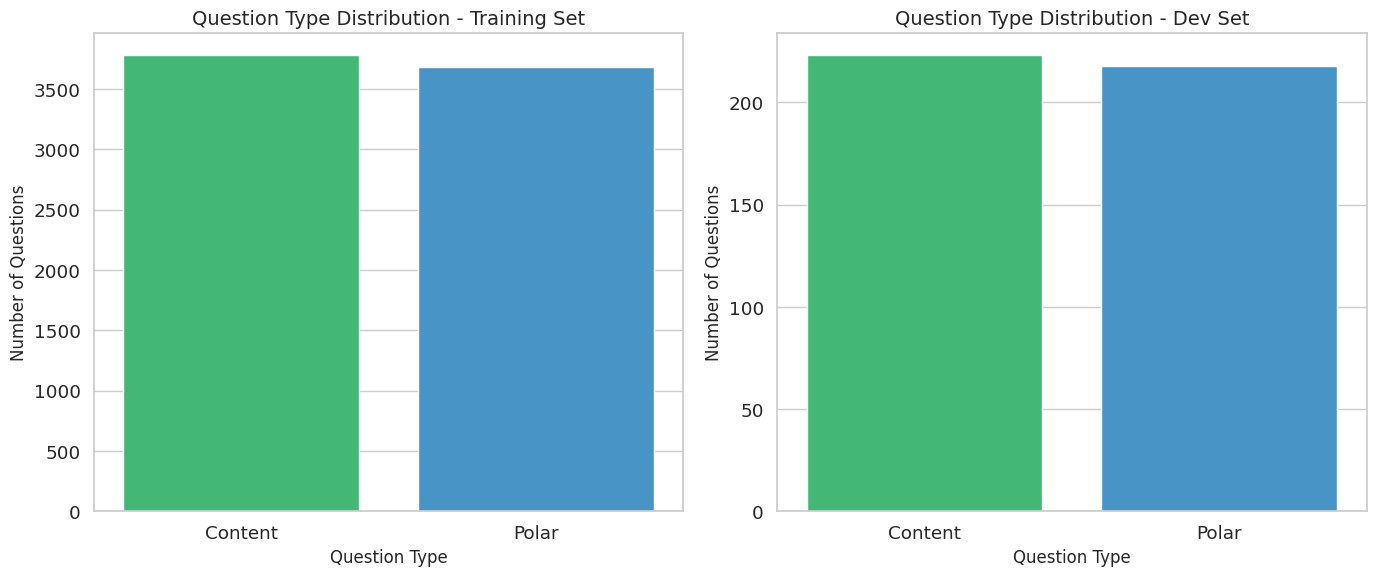

<Figure size 1400x700 with 0 Axes>

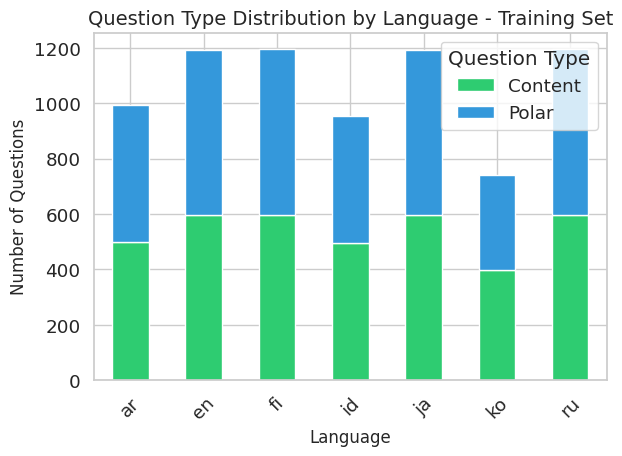

<Figure size 1400x700 with 0 Axes>

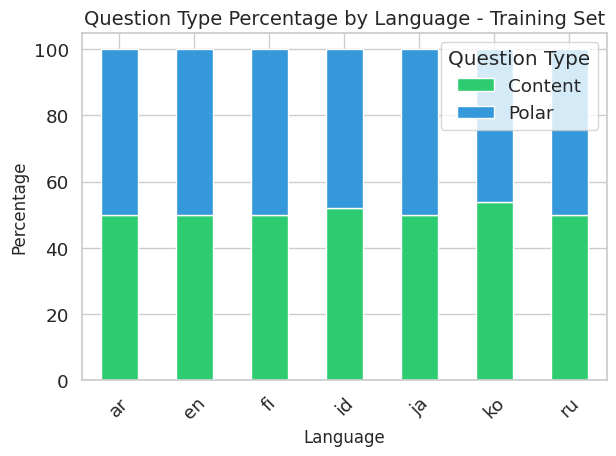

In [6]:
# Question type distribution
print("Question type distribution in training set:")
train_type_dist = train_df['question_type'].value_counts().reset_index()
train_type_dist.columns = ['Type', 'Count']
train_type_dist['Type'] = train_type_dist['Type'].map({0: 'Content', 1: 'Polar'})
train_type_dist['Percentage'] = 100 * train_type_dist['Count'] / len(train_df)
display(train_type_dist)

print("\nQuestion type distribution in dev set:")
dev_type_dist = dev_df['question_type'].value_counts().reset_index()
dev_type_dist.columns = ['Type', 'Count']
dev_type_dist['Type'] = dev_type_dist['Type'].map({0: 'Content', 1: 'Polar'})
dev_type_dist['Percenage'] = 100 * dev_type_dist['Count'] / len(dev_df)
display(dev_type_dist)

# Plot question type distribution
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Type', y='Count', data=train_type_dist, palette=['#2ecc71', '#3498db'])
plt.title('Question Type Distribution - Training Set', fontsize=14)
plt.ylabel('Number of Questions', fontsize=12)
plt.xlabel('Question Type', fontsize=12)

plt.subplot(1, 2, 2)
sns.barplot(x='Type', y='Count', data=dev_type_dist, palette=['#2ecc71', '#3498db'])
plt.title('Question Type Distribution - Dev Set', fontsize=14)
plt.ylabel('Number of Questions', fontsize=12)
plt.xlabel('Question Type', fontsize=12)
plt.tight_layout()
plt.show()

# Question type distribution per language
plt.figure(figsize=(14, 7))
train_type_by_lang = pd.crosstab(train_df['language'], train_df['question_type'])
train_type_by_lang.columns = ['Content', 'Polar']
train_type_by_lang.plot(kind='bar', stacked=True, color=['#2ecc71', '#3498db'])
plt.title('Question Type Distribution by Language - Training Set', fontsize=14)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Number of Questions', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Question Type')
plt.tight_layout()
plt.show()

# Percentage of each question type by language
plt.figure(figsize=(14, 7))
percentage_by_lang = train_type_by_lang.div(train_type_by_lang.sum(axis=1), axis=0) * 100
percentage_by_lang.plot(kind='bar', stacked=True, color=['#2ecc71', '#3498db'])
plt.title('Question Type Percentage by Language - Training Set', fontsize=14)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Question Type')
plt.tight_layout()
plt.show()

In [ ]:
def normalize_complexity_scores(df):    # normalization, per language, of the total scores
  df['lang_norm_complexity_score'] = 0.0

  for language, group in df.groupby('language'):
    min_score = group['complexity_score'].min()
    max_score = group['complexity_score'].max()

    if min_score == max_score:
      df.loc[df['language'] == language, 'lang_norm_complexity_score'] = 0.5
    else:
      normalized_scores = (group['complexity_score'] - min_score) / (max_score - min_score)
      df.loc[df['language'] == language, 'lang_norm_complexity_score'] = normalized_scores.values
  
  return df

train_df = normalize_complexity_scores(train_df)
dev_df = normalize_complexity_scores(dev_df)

print("Original vs Language-Normalized scores (sample from different languages):")
sample_df = train_df.groupby('language').head(2).reset_index(drop=True)
display(sample_df[['language', 'complexity_score', 'lang_norm_complexity_score']])


Original vs Language-Normalized scores (sample from different languages):


,language,complexity_score,lang_norm_complexity_score
0,fi,3.469,0.362834
1,ru,2.192,0.230328
2,fi,4.835,0.537537
3,ko,5.842,0.451126
4,en,3.613,0.411187
5,ru,2.121,0.222492
6,id,4.226,0.461187
7,ko,4.590,0.356184
8,ja,3.586,0.459324
9,en,4.412,0.495515


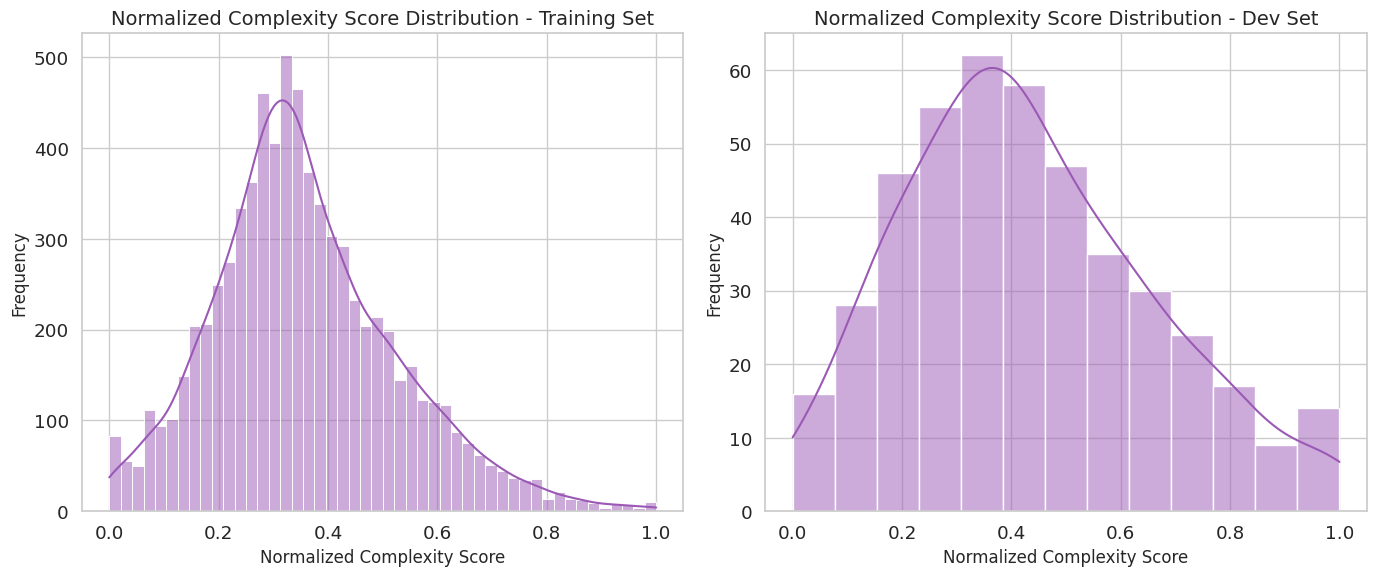

Normalized complexity score statistics - Training set:


count    7460.000000
mean        0.357704
std         0.168595
min         0.000000
25%         0.247852
50%         0.338574
75%         0.454107
max         1.000000
Name: lang_norm_complexity_score, dtype: float64


Normalized complexity score statistics - Dev set:


count    441.000000
mean       0.429592
std        0.227693
min        0.000000
25%        0.270822
50%        0.402643
75%        0.576419
max        1.000000
Name: lang_norm_complexity_score, dtype: float64

/tmp/ipykernel_643909/189980494.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='language', y='lang_norm_complexity_score', data=train_df, palette='viridis')


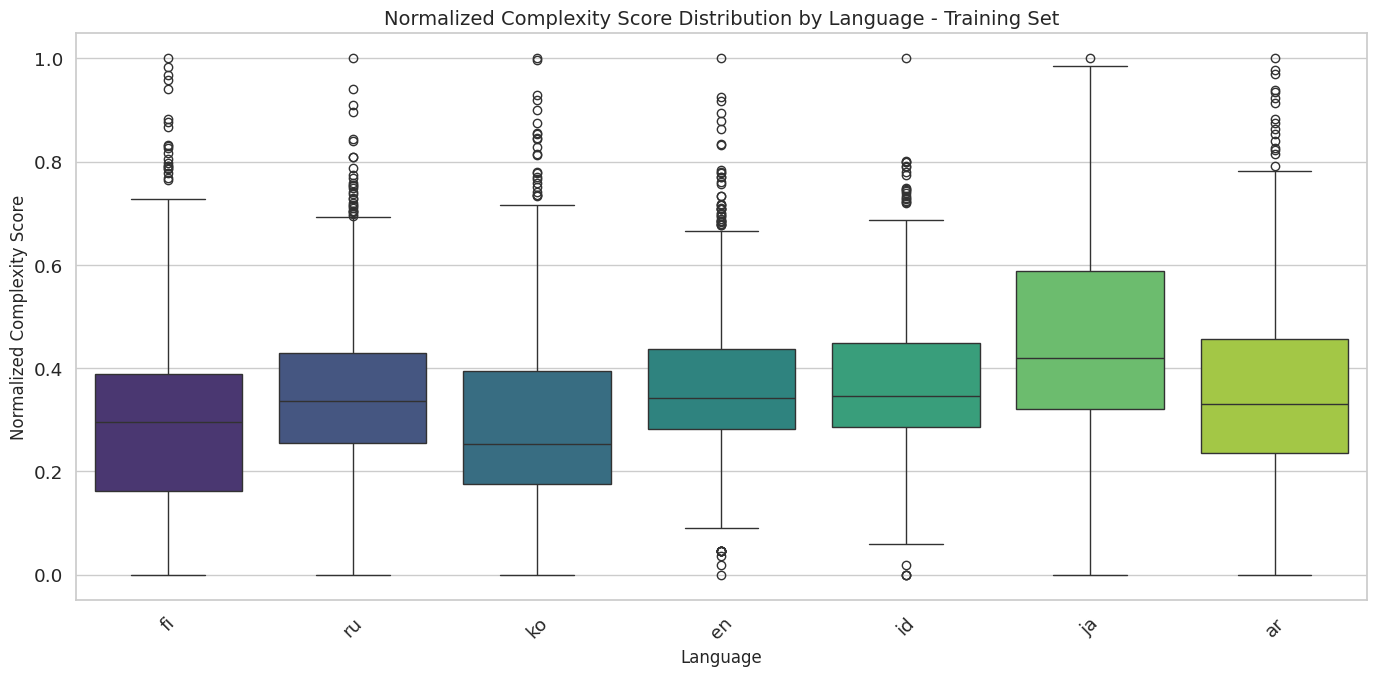

/tmp/ipykernel_643909/189980494.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='question_type', y='lang_norm_complexity_score',


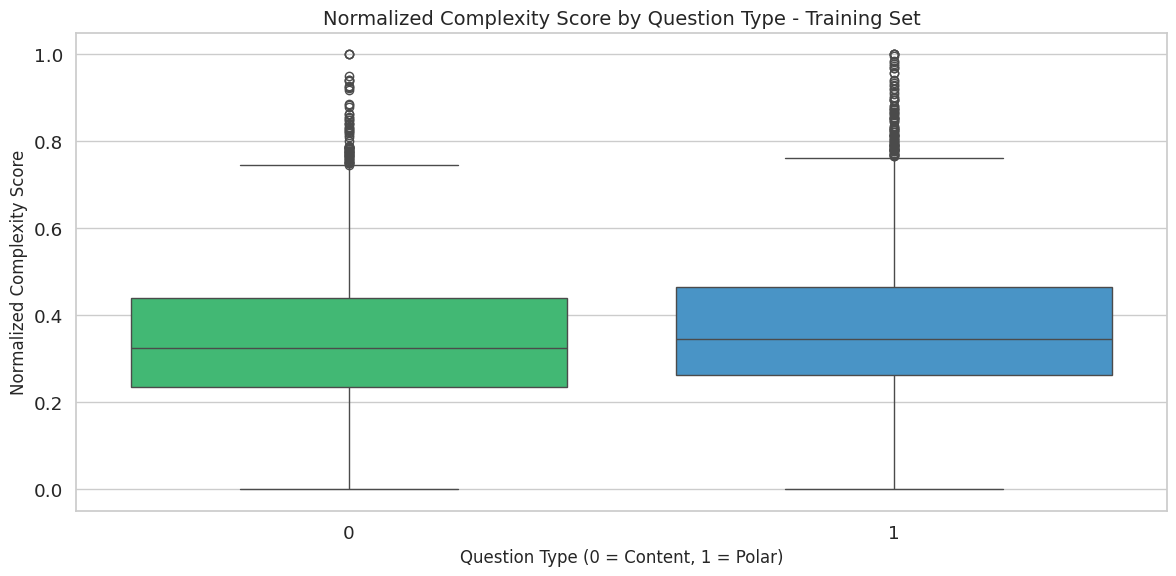

In [ ]:
# Assuming normalize_complexity_scores function is defined elsewhere
train_df = normalize_complexity_scores(train_df)
dev_df = normalize_complexity_scores(dev_df)

# Complexity score distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_df['lang_norm_complexity_score'], kde=True, color='#9b59b6')  # Fixed variable name
plt.title('Normalized Complexity Score Distribution - Training Set', fontsize=14)
plt.xlabel('Normalized Complexity Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1, 2, 2)

sns.histplot(dev_df['lang_norm_complexity_score'], kde=True, color='#9b59b6')  # Uncommented and fixed
plt.title('Normalized Complexity Score Distribution - Dev Set', fontsize=14)
plt.xlabel('Normalized Complexity Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

# Complexity score statistics
print("Normalized complexity score statistics - Training set:")
display(train_df['lang_norm_complexity_score'].describe())
print("\nNormalized complexity score statistics - Dev set:")
display(dev_df['lang_norm_complexity_score'].describe())

# Complexity score boxplot by language
plt.figure(figsize=(14, 7))
sns.boxplot(x='language', y='lang_norm_complexity_score', data=train_df, palette='viridis')
plt.title('Normalized Complexity Score Distribution by Language - Training Set', fontsize=14)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Normalized Complexity Score', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Complexity score by question type
plt.figure(figsize=(12, 6))
sns.boxplot(x='question_type', y='lang_norm_complexity_score', 
            data=train_df, 
            palette=['#2ecc71', '#3498db'])
plt.title('Normalized Complexity Score by Question Type - Training Set', fontsize=14)
plt.xlabel('Question Type (0 = Content, 1 = Polar)', fontsize=12)
plt.ylabel('Normalized Complexity Score', fontsize=12)
plt.tight_layout()
plt.show()

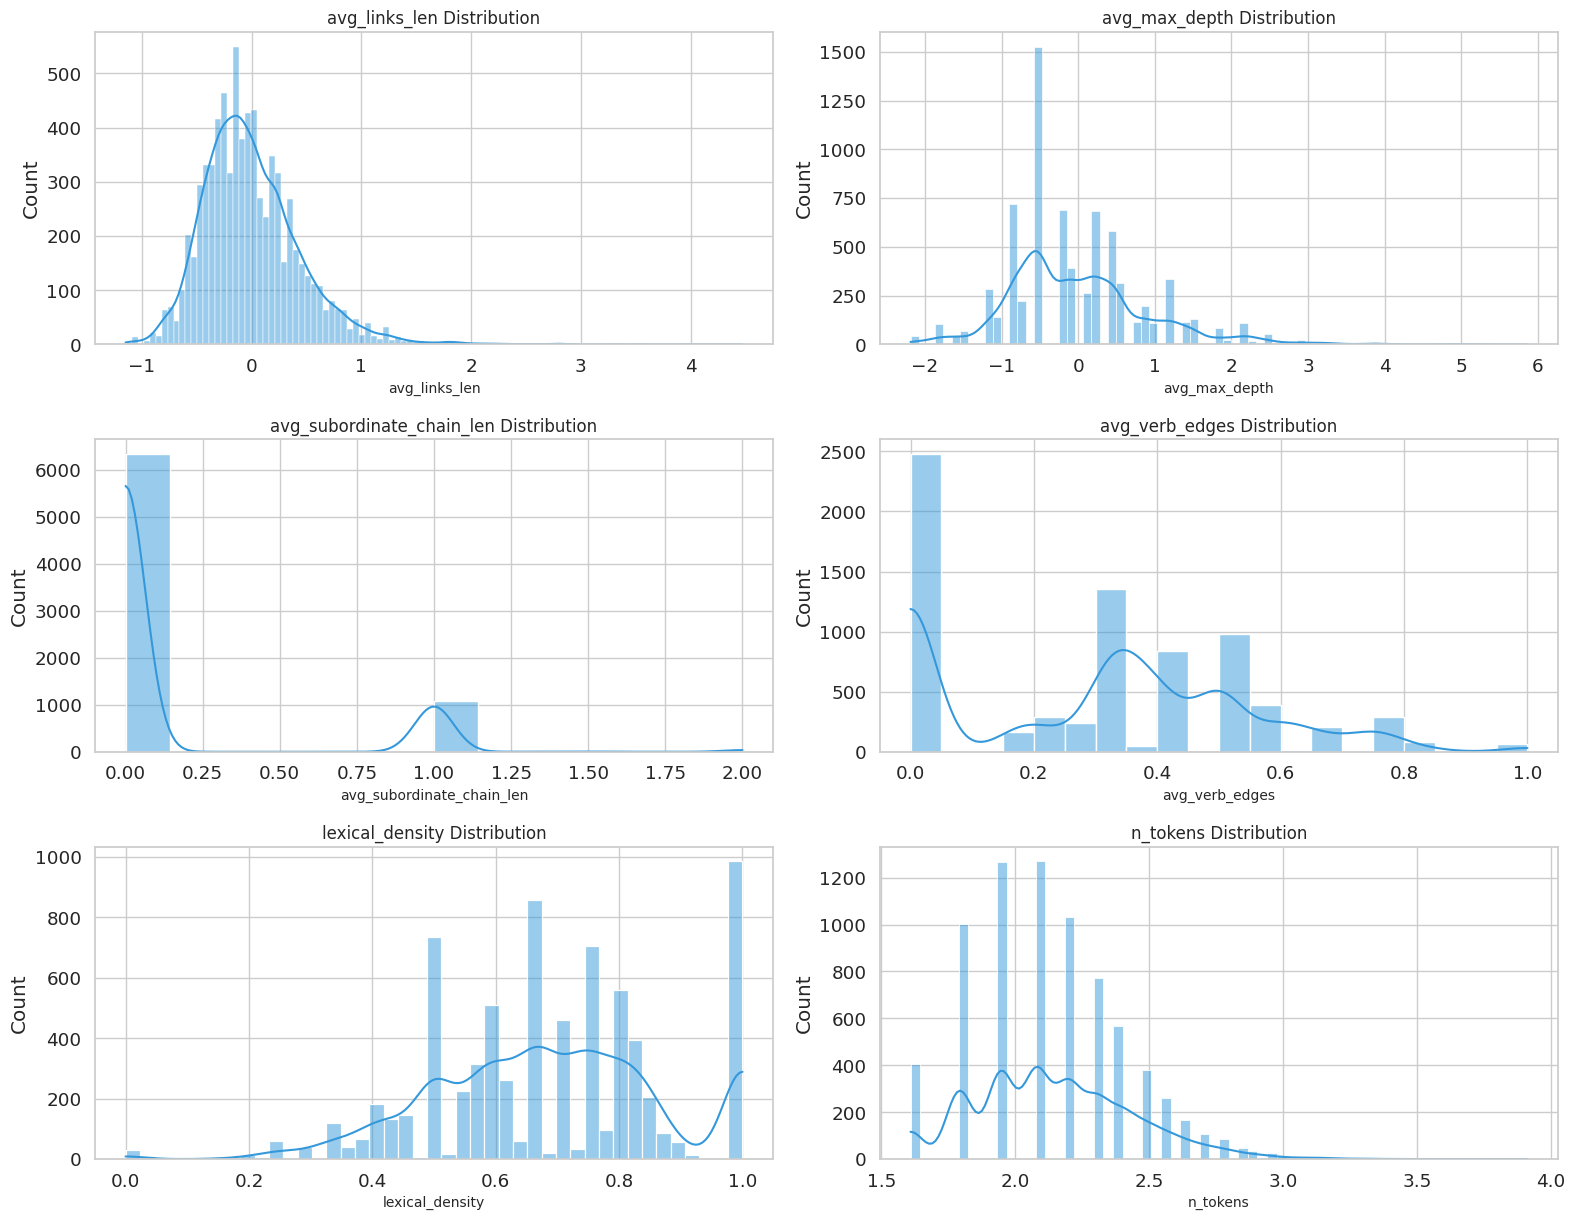

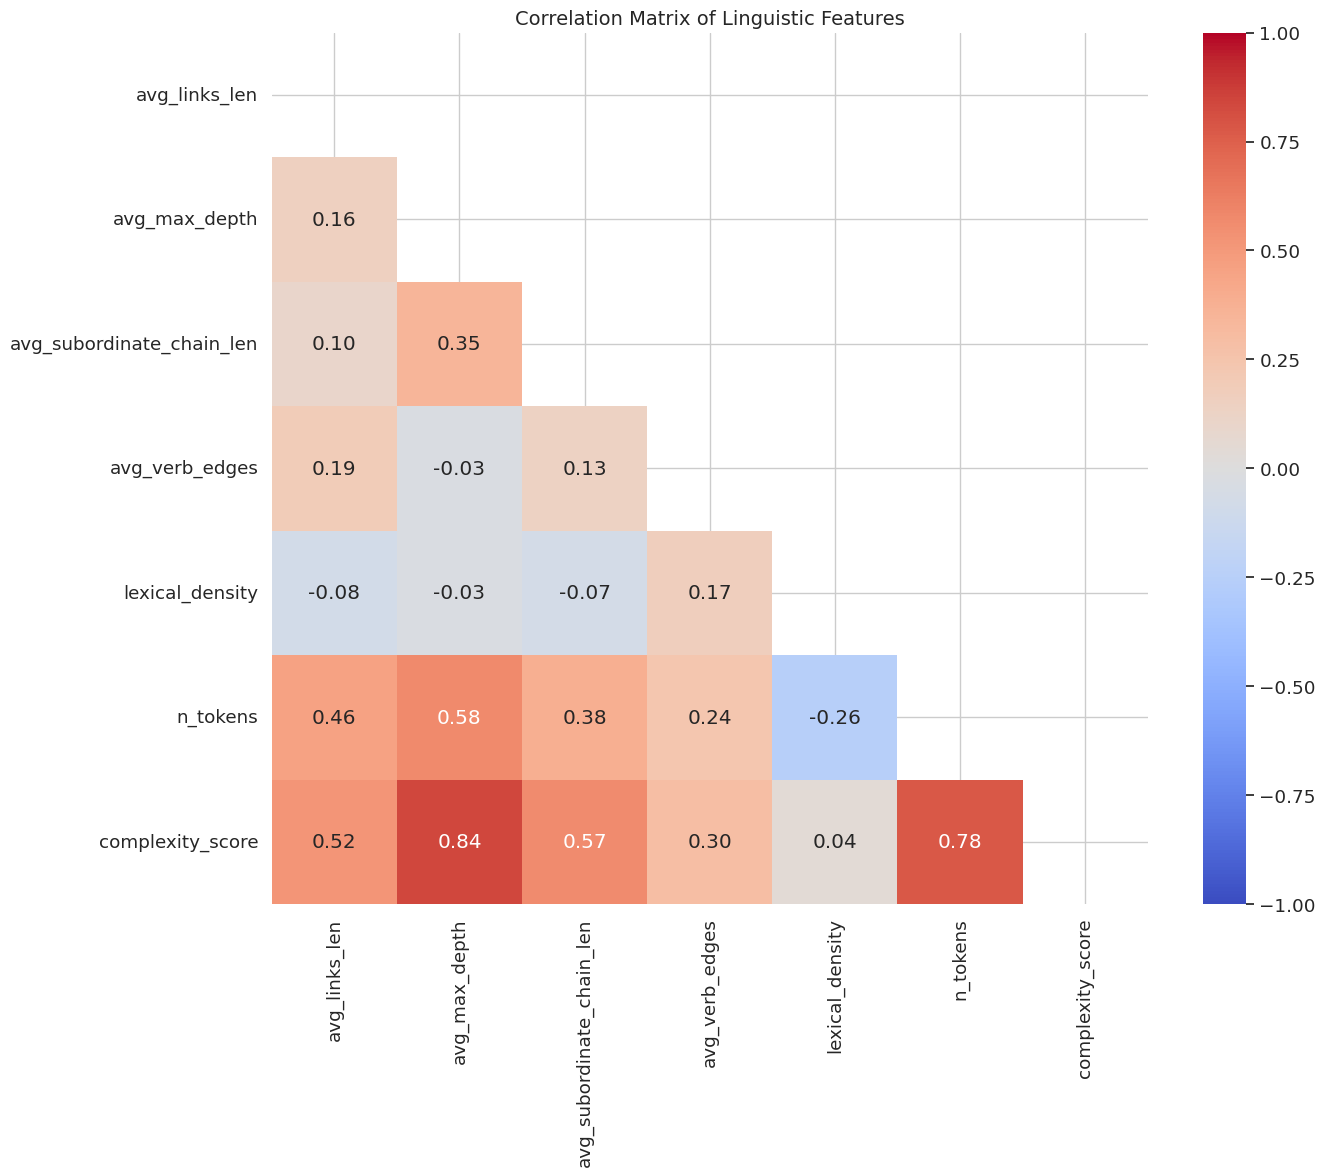

/tmp/ipykernel_643909/736152551.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


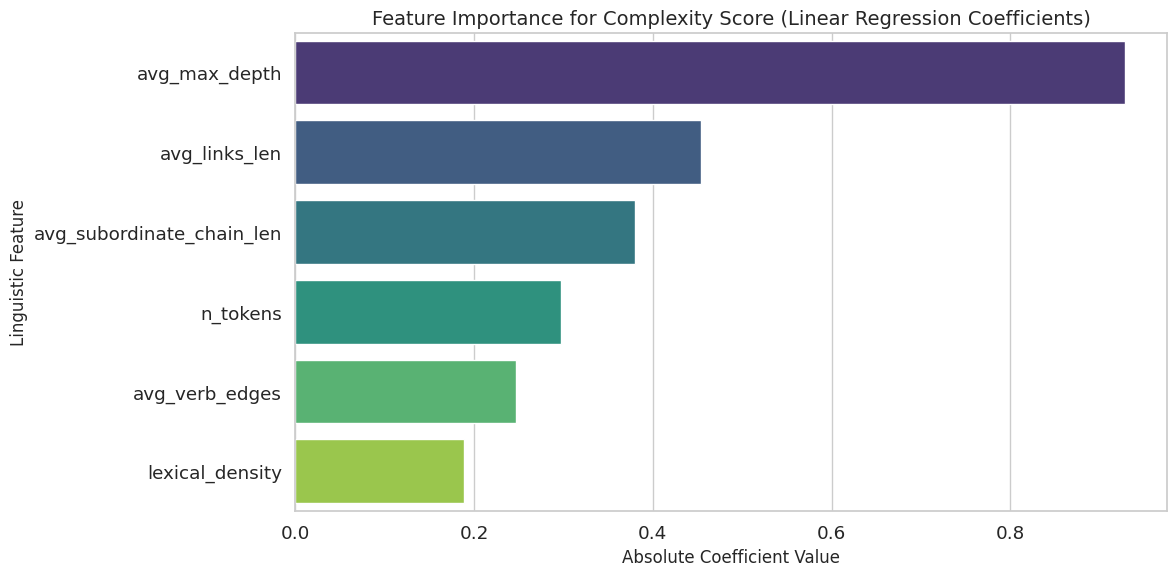

<Figure size 1600x1400 with 0 Axes>

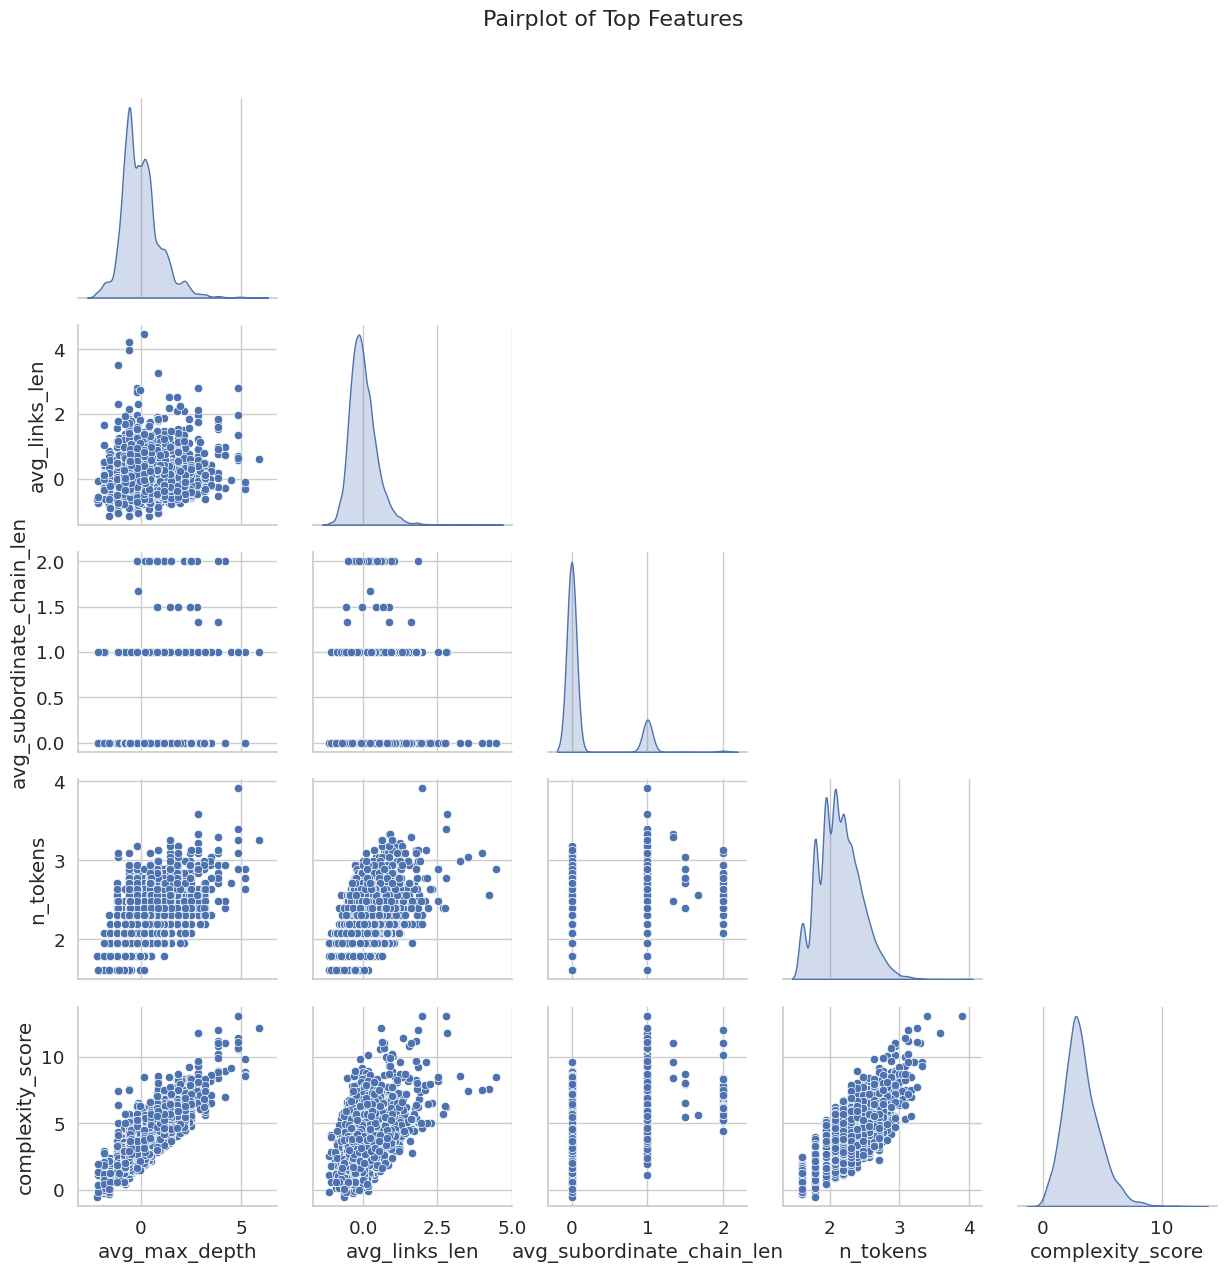

In [ ]:
# List of linguistic features
linguistic_features = [
    'avg_links_len', 'avg_max_depth', 'avg_subordinate_chain_len',
    'avg_verb_edges', 'lexical_density', 'n_tokens'
]


# Distribution of each linguistic feature - Training set
plt.figure(figsize=(16, 16))
for i, feature in enumerate(linguistic_features):
    plt.subplot(4, 2, i+1)
    sns.histplot(train_df[feature], kde=True, color='#3498db')
    plt.title(f'{feature} Distribution', fontsize=12)
    plt.xlabel(feature, fontsize=10)
plt.tight_layout()

plt.show()


# Correlation between linguistic features
plt.figure(figsize=(14, 12))
corr_matrix = train_df[linguistic_features + ['complexity_score']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Linguistic Features', fontsize=14)
plt.tight_layout()
plt.show()

# Feature importance for complexity score - simple linear regression coefficients
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler



# Standardize features for fair comparison

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(train_df[linguistic_features])

y_train = train_df['complexity_score']



# Fit linear model

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Get feature importance

feature_importance = pd.DataFrame({
    'Feature': linguistic_features,
    'Importance': np.abs(lr_model.coef_)
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance for Complexity Score (Linear Regression Coefficients)', fontsize=14)
plt.xlabel('Absolute Coefficient Value', fontsize=12)
plt.ylabel('Linguistic Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Create a pairplot for the most important features
top_features = feature_importance.head(4)['Feature'].tolist() + ['complexity_score']
plt.figure(figsize=(16, 14))
sns.pairplot(train_df[top_features], corner=True, diag_kind='kde')
plt.suptitle('Pairplot of Top Features', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

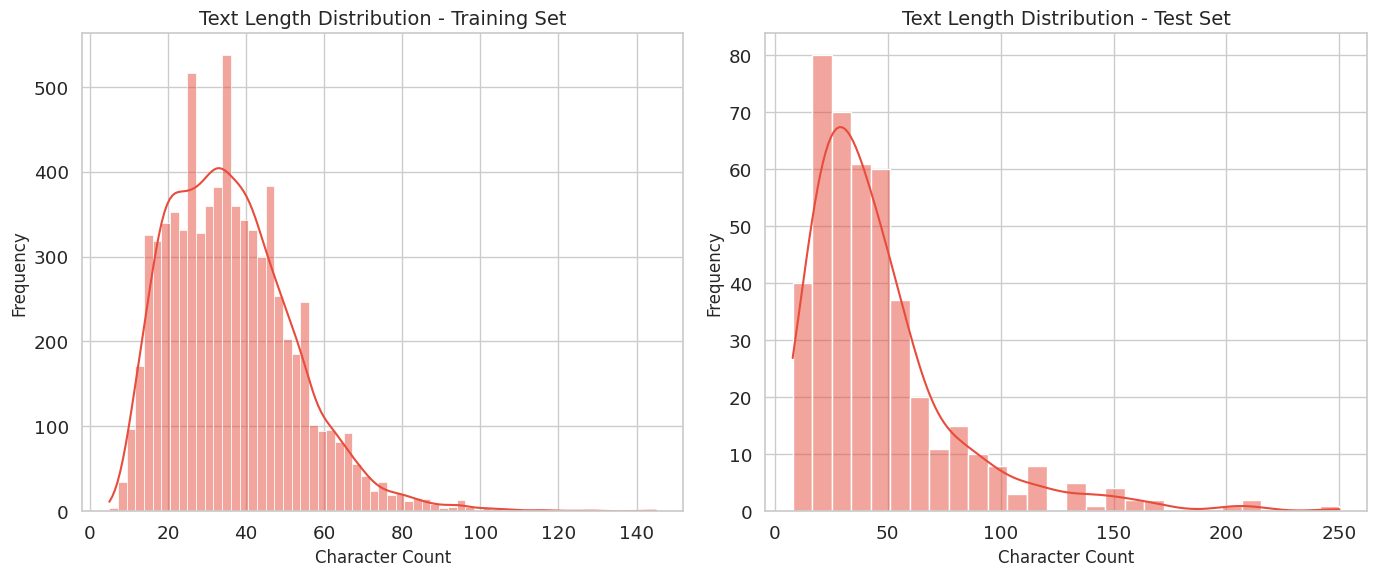

/tmp/ipykernel_643909/3710489382.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='language', y='text_length', data=train_df, palette='viridis')


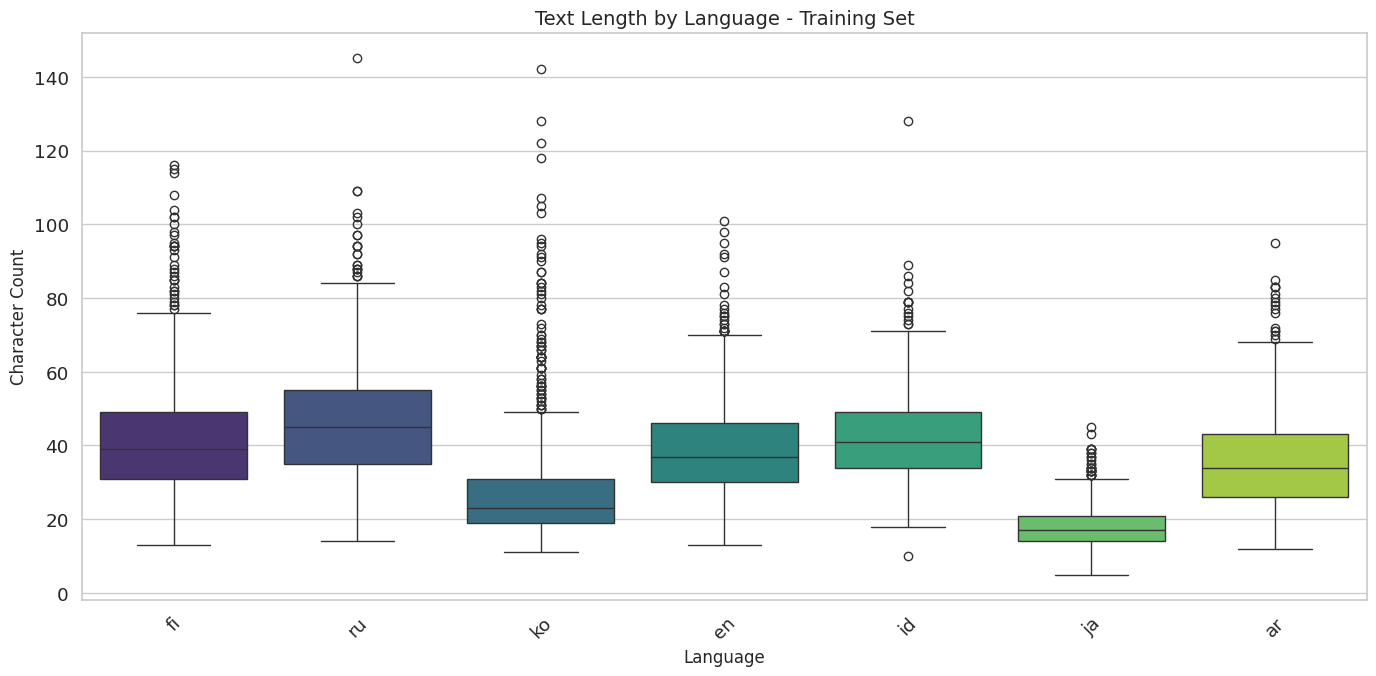

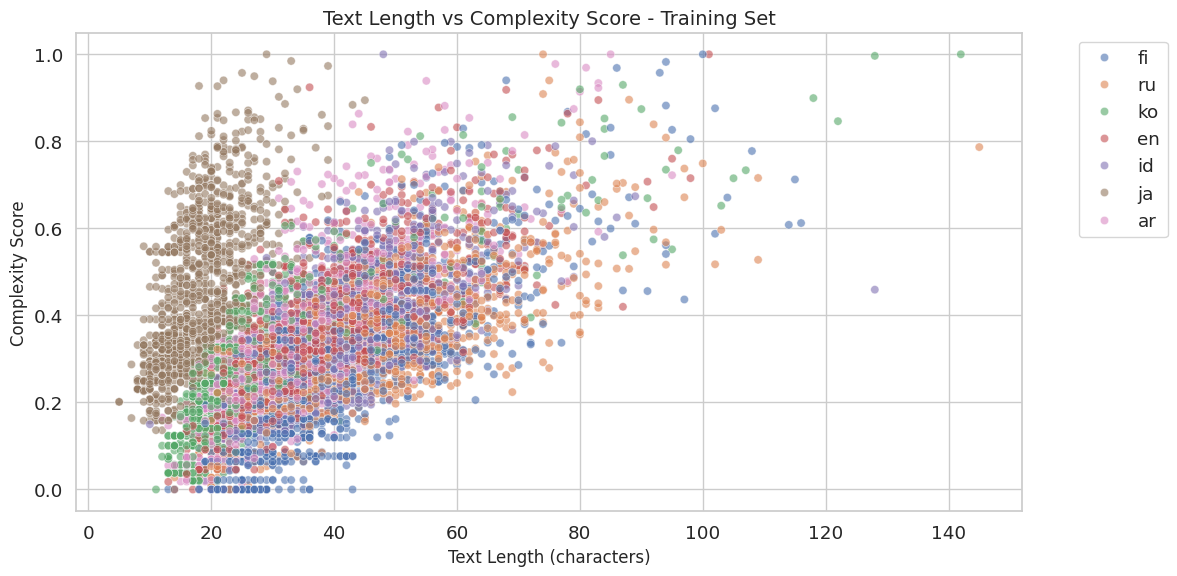

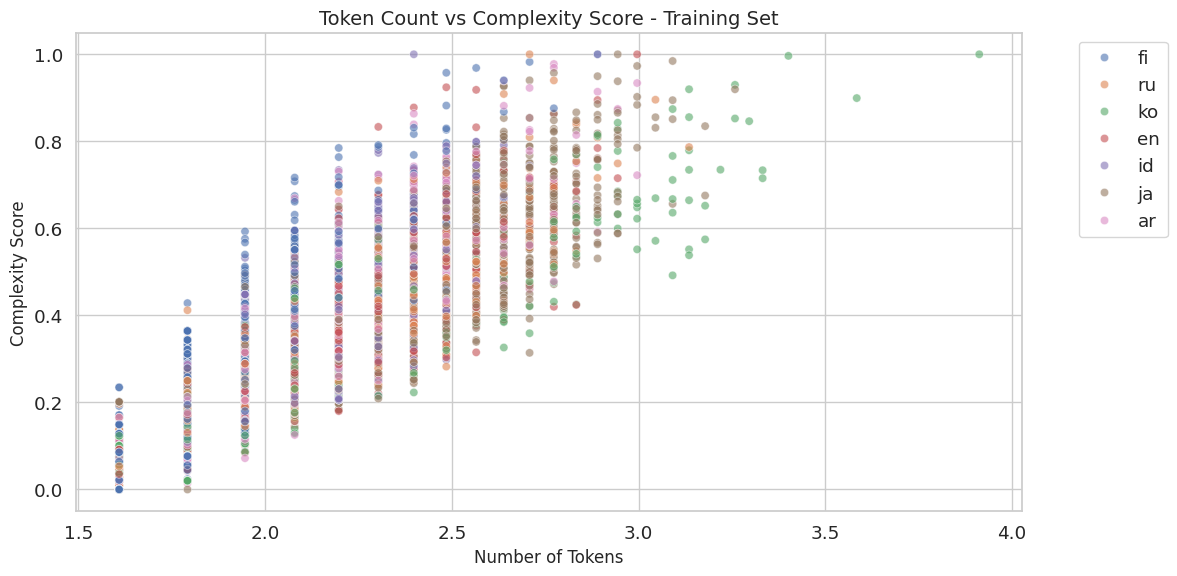

Sample Content Questions (low complexity):
[ru] Против какой армии была (Score: 0.10)
[ar] من إستعمر نيجيريا؟ (Score: -0.21)
[en] What is Topology? (Score: -0.28)

Sample Content Questions (high complexity):
[ru] Сколько лет было Джону Ленону, когда он стал учатником группы The Beatles? (Score: 9.17)
[en] What was the first storm to develop in the 1999–2000 South-West Indian Ocean tropical cyclone season? (Score: 9.19)
[id] Kapan novel We Need to Talk About Kevin dirilis? (Score: 8.94)

Sample Polar Questions (low complexity):
[fi] Onko Brasilialla saaria? (Score: 0.63)
[fi] Onko Díalla asutusta? (Score: 0.63)
[fi] Onko Suomessa patoja? (Score: 0.63)

Sample Polar Questions (high complexity):
[ja] 自動車教習所に通わなくても運転免許を取得することはできる？ (Score: 8.43)
[fi] Onko Pyhä Alphonsus Maria Antony John Francis Cosmas Damian Michael Gaspard de Liguori C.Ss.R. mies? (Score: 8.45)
[ko] 가톨릭 신자들은 모든 주일 (그리스도교)과 더불어 의무 대축일에 해당하는 천주의 성모 마리아 대축일(1월 1일), 주님 부활 대축일, 성모 승천 대축일(8월 15일), 주님 성탄 대축일(12월 25일)에 미사에 참례해야 하

In [25]:
# Text length distribution (character count)
train_df = normalize_complexity_scores(train_df)
dev_df = normalize_complexity_scores(dev_df)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_df['text_length'], kde=True, color='#e74c3c')
plt.title('Text Length Distribution - Training Set', fontsize=14)
plt.xlabel('Character Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1, 2, 2)
sns.histplot(dev_df['text_length'], kde=True, color='#e74c3c')
plt.title('Text Length Distribution - Test Set', fontsize=14)
plt.xlabel('Character Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

# Text length by language
plt.figure(figsize=(14, 7))
sns.boxplot(x='language', y='text_length', data=train_df, palette='viridis')
plt.title('Text Length by Language - Training Set', fontsize=14)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Character Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Relationship between text length and complexity score
plt.figure(figsize=(12, 6))
sns.scatterplot(x='text_length', y='lang_norm_complexity_score', hue='language', data=train_df, alpha=0.6)
plt.title('Text Length vs Complexity Score - Training Set', fontsize=14)
plt.xlabel('Text Length (characters)', fontsize=12)
plt.ylabel('Complexity Score', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Relationship between n_tokens and complexity score
plt.figure(figsize=(12, 6))
sns.scatterplot(x='n_tokens', y='lang_norm_complexity_score', hue='language', data=train_df, alpha=0.6)
plt.title('Token Count vs Complexity Score - Training Set', fontsize=14)
plt.xlabel('Number of Tokens', fontsize=12)
plt.ylabel('Complexity Score', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Sample questions by type and complexity
print("Sample Content Questions (low complexity):")
for sample in train_df[train_df['question_type'] == 0].sort_values('lang_norm_complexity_score').head(3).itertuples():
    print(f"[{sample.language}] {sample.text} (Score: {sample.complexity_score:.2f})")

print("\nSample Content Questions (high complexity):")
for sample in train_df[train_df['question_type'] == 0].sort_values('lang_norm_complexity_score', ascending=False).head(3).itertuples():
    print(f"[{sample.language}] {sample.text} (Score: {sample.complexity_score:.2f})")

print("\nSample Polar Questions (low complexity):")
for sample in train_df[train_df['question_type'] == 1].sort_values('lang_norm_complexity_score').head(3).itertuples():
    print(f"[{sample.language}] {sample.text} (Score: {sample.complexity_score:.2f})")

print("\nSample Polar Questions (high complexity):")
for sample in train_df[train_df['question_type'] == 1].sort_values('lang_norm_complexity_score', ascending=False).head(3).itertuples():
    print(f"[{sample.language}] {sample.text} (Score: {sample.complexity_score:.2f})")

In [11]:
# Point-biserial correlation (appropriate for binary vs. continuous variables)
from scipy.stats import pointbiserialr

# Overall correlation
correlation, p_value = pointbiserialr(train_df['question_type'], train_df['complexity_score'])
print(f"Overall correlation: r = {correlation:.4f}, p = {p_value:.4g}")

# Correlation per language (to identify language-specific patterns)
print("\nCorrelation by language:")
for lang in train_df['language'].unique():
    lang_df = train_df[train_df['language'] == lang]
    corr, p = pointbiserialr(lang_df['question_type'], lang_df['complexity_score'])
    print(f"{lang}: r = {corr:.4f}, p = {p:.4g}")

Overall correlation: r = 0.0438, p = 0.0001338

Correlation by language:
en: r = -0.1034, p = 0.0003492
ja: r = -0.1169, p = 5.322e-05
ar: r = 0.1626, p = 2.532e-07
fi: r = 0.0083, p = 0.7751
id: r = 0.0282, p = 0.3575
ko: r = 0.2783, p = 4.013e-15
ru: r = 0.1534, p = 1.018e-07


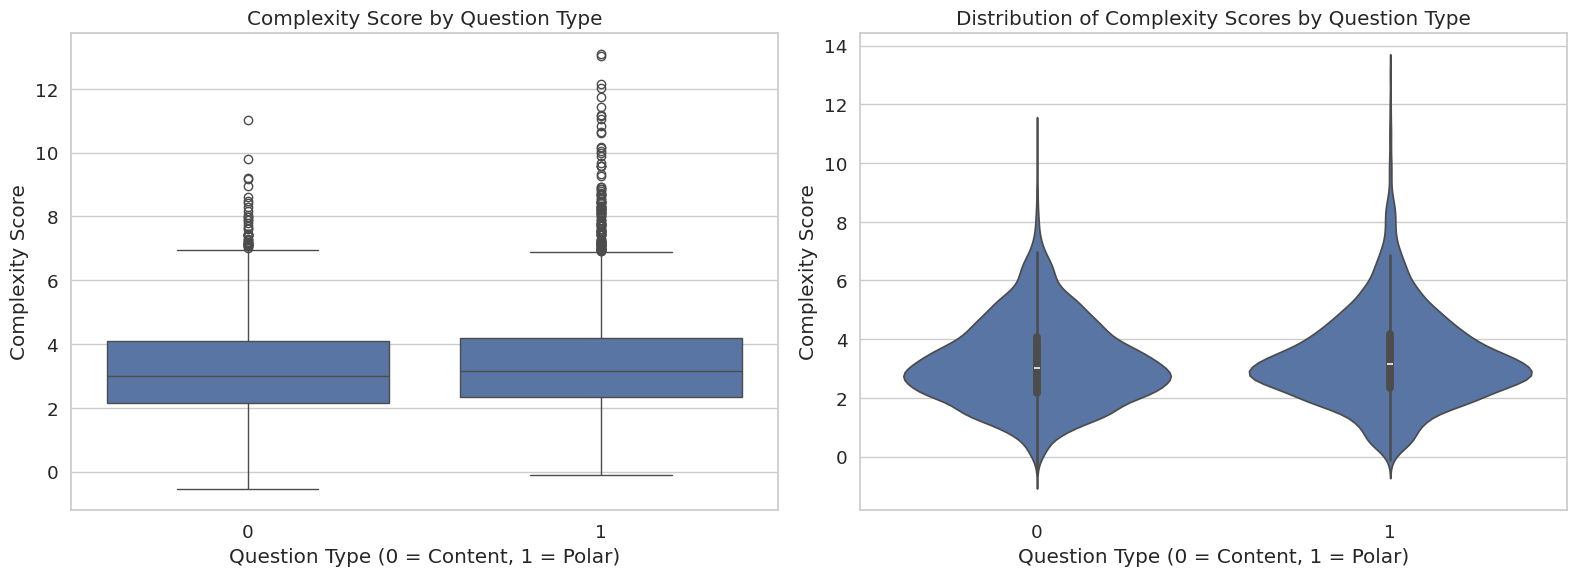

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot
sns.boxplot(x='question_type', y='complexity_score', data=train_df, ax=ax1)
ax1.set_title('Complexity Score by Question Type')
ax1.set_xlabel('Question Type (0 = Content, 1 = Polar)')
ax1.set_ylabel('Complexity Score')

# Violin plot for distribution shapes
sns.violinplot(x='question_type', y='complexity_score', data=train_df, ax=ax2)
ax2.set_title('Distribution of Complexity Scores by Question Type')
ax2.set_xlabel('Question Type (0 = Content, 1 = Polar)')
ax2.set_ylabel('Complexity Score')

plt.tight_layout()
plt.savefig('complexity_by_question_type.png')
plt.show()

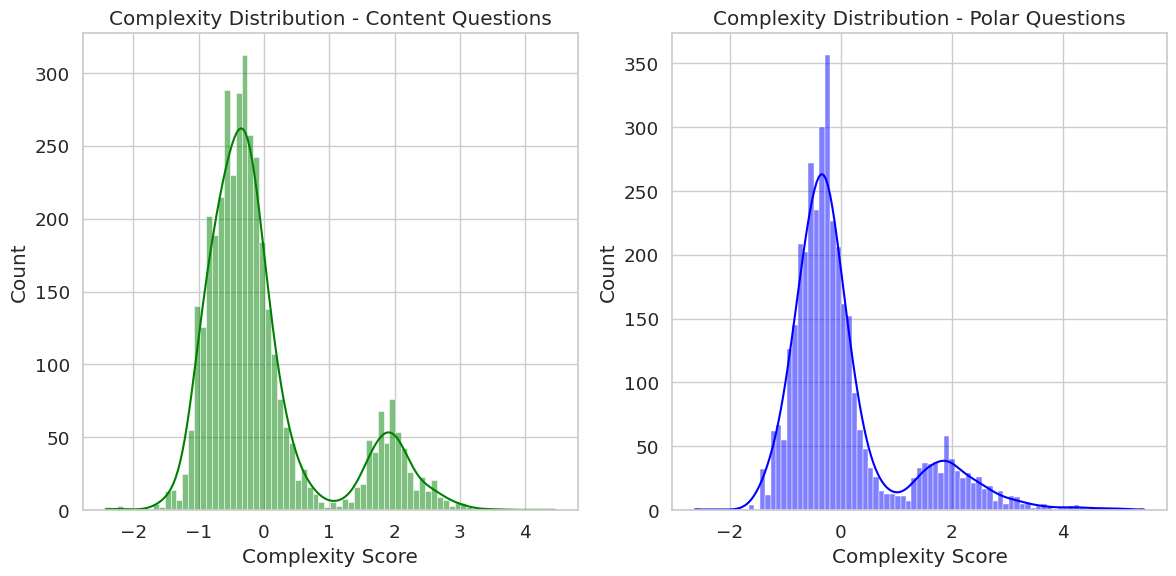

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_df[train_df['question_type'] == 0]['complexity_score'], 
             kde=True, color='green', label='Content')
plt.title('Complexity Distribution - Content Questions')
plt.xlabel('Complexity Score')

plt.subplot(1, 2, 2)
sns.histplot(train_df[train_df['question_type'] == 1]['complexity_score'], 
             kde=True, color='blue', label='Polar')
plt.title('Complexity Distribution - Polar Questions')
plt.xlabel('Complexity Score')

plt.tight_layout()
plt.savefig('complexity_histograms_by_type.png')
plt.show()

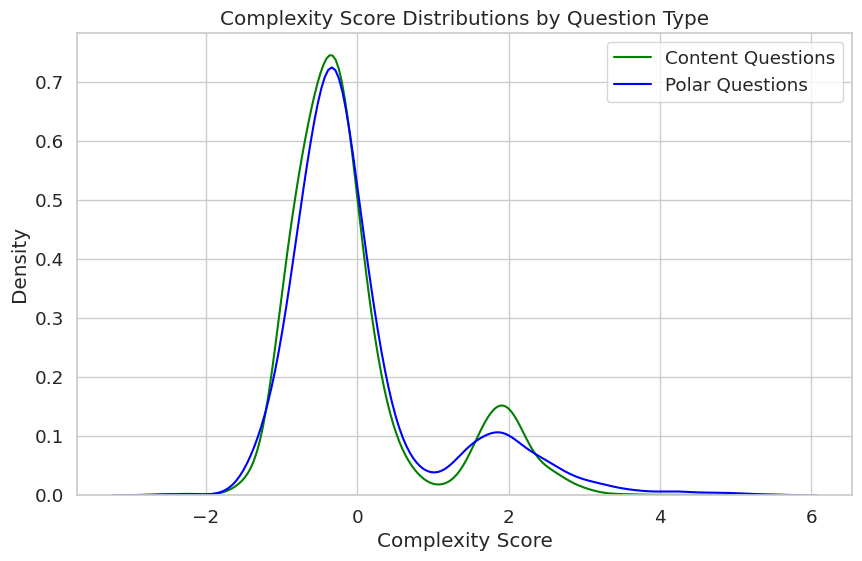

In [14]:
plt.figure(figsize=(10, 6))
sns.kdeplot(train_df[train_df['question_type'] == 0]['complexity_score'], 
            label='Content Questions', color='green')
sns.kdeplot(train_df[train_df['question_type'] == 1]['complexity_score'], 
            label='Polar Questions', color='blue')
plt.title('Complexity Score Distributions by Question Type')
plt.xlabel('Complexity Score')
plt.ylabel('Density')
plt.legend()
plt.savefig('complexity_kde_by_type.png')
plt.show()

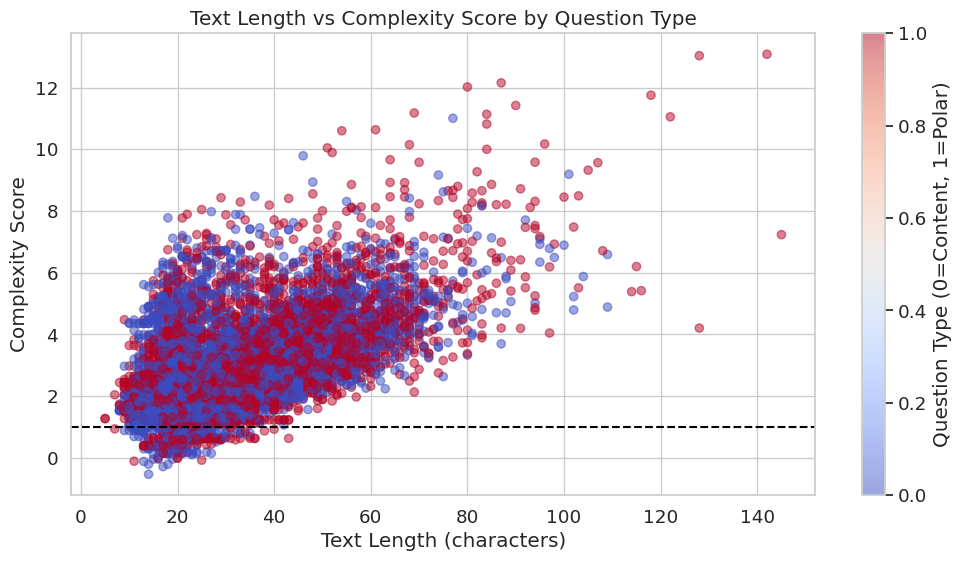

Percentage of question types within each complexity band:
question_type      Content      Polar
complexity_band                      
Lower Band       50.967742  49.032258
Upper Band       50.629371  49.370629


In [13]:
# Create a scatter plot colored by question type
plt.figure(figsize=(12, 6))

# Plot with question type coloring
scatter = plt.scatter(
    train_df['text_length'], 
    train_df['complexity_score'],
    c=train_df['question_type'],
    alpha=0.5,
    cmap='coolwarm'
)

# Add threshold line between the two bands (approximately at 1.0)
plt.axhline(y=1.0, color='black', linestyle='--')
plt.colorbar(scatter, label='Question Type (0=Content, 1=Polar)')
plt.title('Text Length vs Complexity Score by Question Type')
plt.xlabel('Text Length (characters)')
plt.ylabel('Complexity Score')
plt.savefig('bimodal_by_question_type.png')
plt.show()

# Calculate the percentage of each question type in upper/lower bands
threshold = 1.0
train_df['complexity_band'] = np.where(train_df['complexity_score'] > threshold, 
                                      'Upper Band', 'Lower Band')

# Create a crosstab of band vs question type
band_type_tab = pd.crosstab(
    train_df['complexity_band'], 
    train_df['question_type'].map({0: 'Content', 1: 'Polar'}),
    normalize='index'
) * 100

print("Percentage of question types within each complexity band:")
print(band_type_tab)

In [21]:
from scipy.stats import ttest_ind

content_scores = train_df[train_df['question_type'] == 0]['complexity_score']
polar_scores = train_df[train_df['question_type'] == 1]['complexity_score']

t_stat, p_val = ttest_ind(content_scores, polar_scores, equal_var=False)
print(f"T-test comparing complexity between question types: t={t_stat:.4f}, p={p_val:.4g}")

# Descriptive statistics
stats = train_df.groupby('question_type')['complexity_score'].describe().reset_index()
stats['question_type'] = stats['question_type'].map({0: 'Content', 1: 'Polar'})

print("\nComplexity score statistics by question type:")
print(stats)

T-test comparing complexity between question types: t=-3.8133, p=0.0001383

Complexity score statistics by question type:
  question_type   count      mean       std    min    25%    50%    75%    max
0       Content  3871.0 -0.042958  0.944731 -2.429 -0.629 -0.291  0.085  4.460
1         Polar  3721.0  0.044695  1.052686 -2.628 -0.578 -0.261  0.185  5.462
